In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import json
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435


In [6]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'revenue'],
      dtype='object')

In [7]:
df_train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,2999,2844,2945,3000,2998.000000,2980,3000,2403,3000,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,2999,2383,321,2398,NaN,401,2,2400,2969,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0099329,en,Casino Royale,A newly developed microchip designed by Zorin ...,NaN,/r4oAoqKQb0GPJ0gO1CWshveTJzt.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/15,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Casino Royale,NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,1,51,1752,5,NaN,1817,2996,3,2,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,6.891920e+07


In [8]:
def repalceNanNone(df,col):
    df_train[col] = df_train[col].replace('NaN','[{"id":999999,"name":"default"}]')
    df_train[col] = df_train[col].replace('nan','[{"id":999999,"name":"default"}]')
    df_train[col] = df_train[col].fillna('[{"id":999999,"name":"default"}]')
    df_train[col] = df_train[col].replace("\'","\"").replace(str(None),"\"DEFAULT\"")

In [9]:
repalceNanNone(df_train,'belongs_to_collection')
repalceNanNone(df_train,'genres')

In [10]:
def getCollectId(collection):
    try:
        return json.loads(collection[1:-1].replace("\'","\"").replace(str(None),"\"DEFAULT\""))['id']
    except json.decoder.JSONDecodeError:
        return 999999


In [11]:
df_train['collection_id']= df_train['belongs_to_collection'].apply(lambda x: getCollectId(x))

In [12]:
def getCollectname(collection):
 #   print(json.loads(collection[1:-1].replace("\'","\"").replace(str(None),"\"DEFAULT\"")))
    #print(json.loads(collection[1:-1].replace("\'","\"").replace(str(None),"\"DEFAULT\""))['id'])
    try:
        return json.loads(collection[1:-1].replace("\'","\"").replace(str(None),"\"DEFAULT\""))['name']
    except json.decoder.JSONDecodeError:
        return "DEFAULT"

In [13]:
df_train['collection_name']= df_train['belongs_to_collection'].apply(lambda x: getCollectname(x))

In [14]:
#Getting different genres:
all_gen = []


def getGenreName(genres):
    l = genres[1:-1].split("},")
    l_g = [(l+'}').replace("}}","}") for l in l]
    for i in l_g:
        name = json.loads(i.replace("\'","\""))['name']
        if name in all_gen:
            pass
        else:
            all_gen.append(name)
    return all_gen

In [15]:
x = df_train['genres'].apply(lambda x: getGenreName(x))

In [16]:
all_gen

['Comedy',
 'Drama',
 'Family',
 'Romance',
 'Thriller',
 'Action',
 'Animation',
 'Adventure',
 'Horror',
 'Documentary',
 'Music',
 'Crime',
 'Science Fiction',
 'Mystery',
 'Foreign',
 'Fantasy',
 'War',
 'Western',
 'History',
 'default',
 'TV Movie']

In [17]:
new_gen_cols = all_gen

In [18]:
def getGenreName(genres,need = None):
    l = genres[1:-1].split("},")
    l_g = [(l+'}').replace("}}","}") for l in l]
    genre_ids = []
    genre_names = []
    for i in l_g:
        gen_name = json.loads(i.replace("\'","\""))['name']
        gen_id = json.loads(i.replace("\'","\""))['id']
        genre_ids.append(gen_id)
        genre_names.append(gen_name)
    if need == 'id':
        return genre_ids
    elif need == "name":
        return genre_names
    else:
        pass

In [19]:
df_train['genre_name_list'] = df_train['genres'].apply(lambda x: getGenreName(x,'name') )

In [20]:
#Creating columns for each genres and populating value
for col in new_gen_cols:
    df_train[col] = df_train['genre_name_list'].apply(lambda x: 1 if col in x else 0)

In [21]:
#Creating column for count of genres:
df_train['num_of_genres'] = df_train['genre_name_list'].apply(lambda x: len(x))

production_companies

In [22]:
repalceNanNone(df_train,'production_companies')

In [23]:
#Getting different genres:
all_prod_com = []


def getGProdName(prod_names):
    l = prod_names[1:-1].split("},")
    l_g = [(l+'}').replace("}}","}") for l in l]
    for i in l_g:
        name = json.loads(i.replace("\'","\""))['name']
        if name in all_prod_com:
            pass
        else:
            all_prod_com.append(name)

In [24]:
#For Production company:
all_com_names = []
def getProdCompanyName(production_companies,need = None):
    l = production_companies[1:-1].split("},")
    l_g = [(l+'}').replace("}}","}") for l in l]
    production_companies_ids = []
    production_companies_names = []
    try:
        for i in l_g:
            production_companies_name = json.loads(i.replace("\'","\"").replace("\\",""))['name']
            production_companies_id = json.loads(i.replace("\'","\"").replace("\\",""))['id']
            production_companies_ids.append(production_companies_id)
            production_companies_names.append(production_companies_name)
        if need == 'id':
            return production_companies_name_ids
        elif need == "name":
            if production_companies_name not in all_com_names:
                all_com_names.append(production_companies_name)
            return production_companies_names
        else:
            pass
    except json.decoder.JSONDecodeError:
        return "DEFAULT"

In [25]:
df_train['prodcution_company_list'] = df_train['production_companies'].apply(lambda x:getProdCompanyName(x,need='name') )
df_train['prodcution_company_count'] = df_train['prodcution_company_list'].apply(lambda x: 0 if x is None else len(x))

spoken_languages

In [26]:
df_train['spoken_languages'] = df_train['spoken_languages'].replace('NaN','[{"iso_639_1":"default","name":"default"}]')
df_train['spoken_languages'] = df_train['spoken_languages'].replace('nan','[{"iso_639_1":"default","name":"default"}]')
df_train['spoken_languages'] = df_train['spoken_languages'].fillna('[{"iso_639_1":"default","name":"default"}]')
df_train['spoken_languages'] = df_train['spoken_languages'].replace("\'","\"").replace(str(None),"\"DEFAULT\"")

In [27]:
#For Production company:
all_lan_names = []
def getSpokenLanguageISOName(spoken_languages,need = None):
#    print(spoken_languages)
    l = spoken_languages[1:-1].split("},")
    l_g = [(l+'}').replace("}}","}") for l in l]
    spoken_languages_ids = []
    spoken_languages_names = []
    try:
        for i in l_g:
            spoken_languages_name = json.loads(i.replace("\'","\"").replace("\\",""))['iso_639_1']
            spoken_languages_id = json.loads(i.replace("\'","\"").replace("\\",""))['name']
            spoken_languages_ids.append(spoken_languages_id)
            spoken_languages_names.append(spoken_languages_name)
        if need == 'id':
            return spoken_languages_ids
        elif need == "name":
            if spoken_languages_name not in all_lan_names:
                all_lan_names.append(spoken_languages_name)
            return spoken_languages_names
        else:
            pass
    except json.decoder.JSONDecodeError:
        return "DEFAULT"

In [28]:
df_train['language_list'] = df_train['spoken_languages'].apply(lambda x: getSpokenLanguageISOName(x,need='name'))
df_train['language_count'] = df_train['language_list'].apply(lambda x: 0 if x is None else len(x))
df_train['language_is_english'] = df_train['language_list'].apply(lambda x: 1 if 'en' in x else 0)

release_date

In [29]:
from datetime import datetime
from datetime import timedelta

now = datetime.now()

In [30]:
df_train['release_date'] = df_train['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%y')) 
df_train['day_since_realeased'] = df_train['release_date'].apply(lambda x: (now-x).days)

Primary variable list:  
-----------------------  
budget  
num_of_genres  
collection_id  
runtime  
release_date  
popularity  
prodcution_company_count  
language_count  
language_is_english  
day_since_realeased  

Secondary variable list:  
------------------------  
Comedy  
Drama  
Family  
Romance  
Thriller  
Action  
Animation  
Adventure  
Horror  
Documentary  
Music  
Crime  
Science Fiction  
Mystery  
Foreign  
Fantasy  
War  
Western  
History  
default  


In [31]:
df_train.head(4)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,revenue,collection_id,collection_name,genre_name_list,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,default,TV Movie,num_of_genres,prodcution_company_list,prodcution_company_count,language_list,language_count,language_is_english,day_since_realeased
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,313576,Hot Tub Time Machine Collection,[Comedy],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[Paramount Pictures, United Artists, Metro-Gol...",3,[en],1,1,1835
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435,107674,The Princess Diaries Collection,"[Comedy, Drama, Family, Romance]",1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,[Walt Disney Pictures],1,[en],1,1,5685
2,3,"[{""id"":999999,""name"":""default""}]",3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,13092000,999999,default,[Drama],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[Bold Films, Blumhouse Productions, Right of W...",3,[en],1,1,1968
3,4,"[{""id"":999999,""name"":""default""}]",1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,"[{""id"":999999,""name"":""default""}]","[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,16000000,999999,default,"[Thriller, Drama]",0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,[default],1,"[en, hi]",2,1,2913


Exploratory Data Analysis with Primary Variables:

In [32]:
#Primary column list
prim_col = ['id','budget','num_of_genres','collection_id','runtime','release_date','popularity','prodcution_company_count','language_count','language_is_english','day_since_realeased','revenue']


In [33]:
prim_col

['id',
 'budget',
 'num_of_genres',
 'collection_id',
 'runtime',
 'release_date',
 'popularity',
 'prodcution_company_count',
 'language_count',
 'language_is_english',
 'day_since_realeased',
 'revenue']

In [34]:
df_train[prim_col].head(10)

,id,budget,num_of_genres,collection_id,runtime,release_date,popularity,prodcution_company_count,language_count,language_is_english,day_since_realeased,revenue
0,1,14000000,1,313576,93.0,2015-02-20,6.575393,3,1,1,1835,12314651
1,2,40000000,4,107674,113.0,2004-08-06,8.248895,1,1,1,5685,95149435
2,3,3300000,1,999999,105.0,2014-10-10,64.299990,3,1,1,1968,13092000
3,4,1200000,2,999999,122.0,2012-03-09,3.174936,1,2,1,2913,16000000
4,5,0,2,999999,118.0,2009-02-05,1.148070,1,1,0,4041,3923970
5,6,8000000,3,999999,83.0,1987-08-06,0.743274,1,1,1,11895,3261638
6,7,14000000,2,999999,92.0,2012-08-30,7.286477,2,1,1,2739,85446075
7,8,0,1,999999,84.0,2004-01-15,1.949044,1,2,1,5889,2586511
8,9,0,5,256377,100.0,1996-02-16,6.902423,3,1,1,8779,34327391
9,10,6000000,2,999999,91.0,2003-04-16,4.672036,1,1,1,6163,18750246


•	Include a histogram of each of the 5 variables – in your summary and analysis,   
identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).    
•	Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).  

In [35]:
df_train_1 = df_train.loc[df_train['budget']>1000000,prim_col]
df_train_1['budget'] = df_train_1['budget']/1000000
df_train_1['revenue'] = df_train_1['revenue']/1000000

In [36]:
df_train_1.describe()

,id,budget,num_of_genres,collection_id,runtime,popularity,prodcution_company_count,language_count,language_is_english,day_since_realeased,revenue
count,2012.000000,2012.00000,2012.000000,2012.000000,2011.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000
mean,1507.716203,33.55604,2.638668,796685.127237,110.875186,10.150139,3.021372,1.521372,0.919483,5399.040258,93.820281
std,866.775010,40.92917,1.131861,377498.396034,22.239108,14.199703,1.968433,0.942420,0.272159,5333.661003,160.133492
min,1.000000,1.07000,1.000000,10.000000,0.000000,0.011574,1.000000,1.000000,0.000000,-17783.000000,0.000006
25%,751.750000,7.86500,2.000000,999999.000000,96.000000,5.874042,2.000000,1.000000,1.000000,2886.750000,9.748453
50%,1514.500000,19.50000,3.000000,999999.000000,107.000000,8.592823,3.000000,1.000000,1.000000,5108.000000,35.114600
75%,2250.750000,40.00000,3.000000,999999.000000,121.000000,11.892150,4.000000,2.000000,1.000000,8185.500000,107.667806
max,3000.000000,380.00000,7.000000,999999.000000,338.000000,294.337037,16.000000,9.000000,1.000000,18686.000000,1519.557910


## Based on above summary statistics ,  


Let's check them with Histogram.

In [198]:
df_train_2 = df_train_1.loc[df_train_1['revenue']>0]

/opt/python/python35/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/python/python35/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


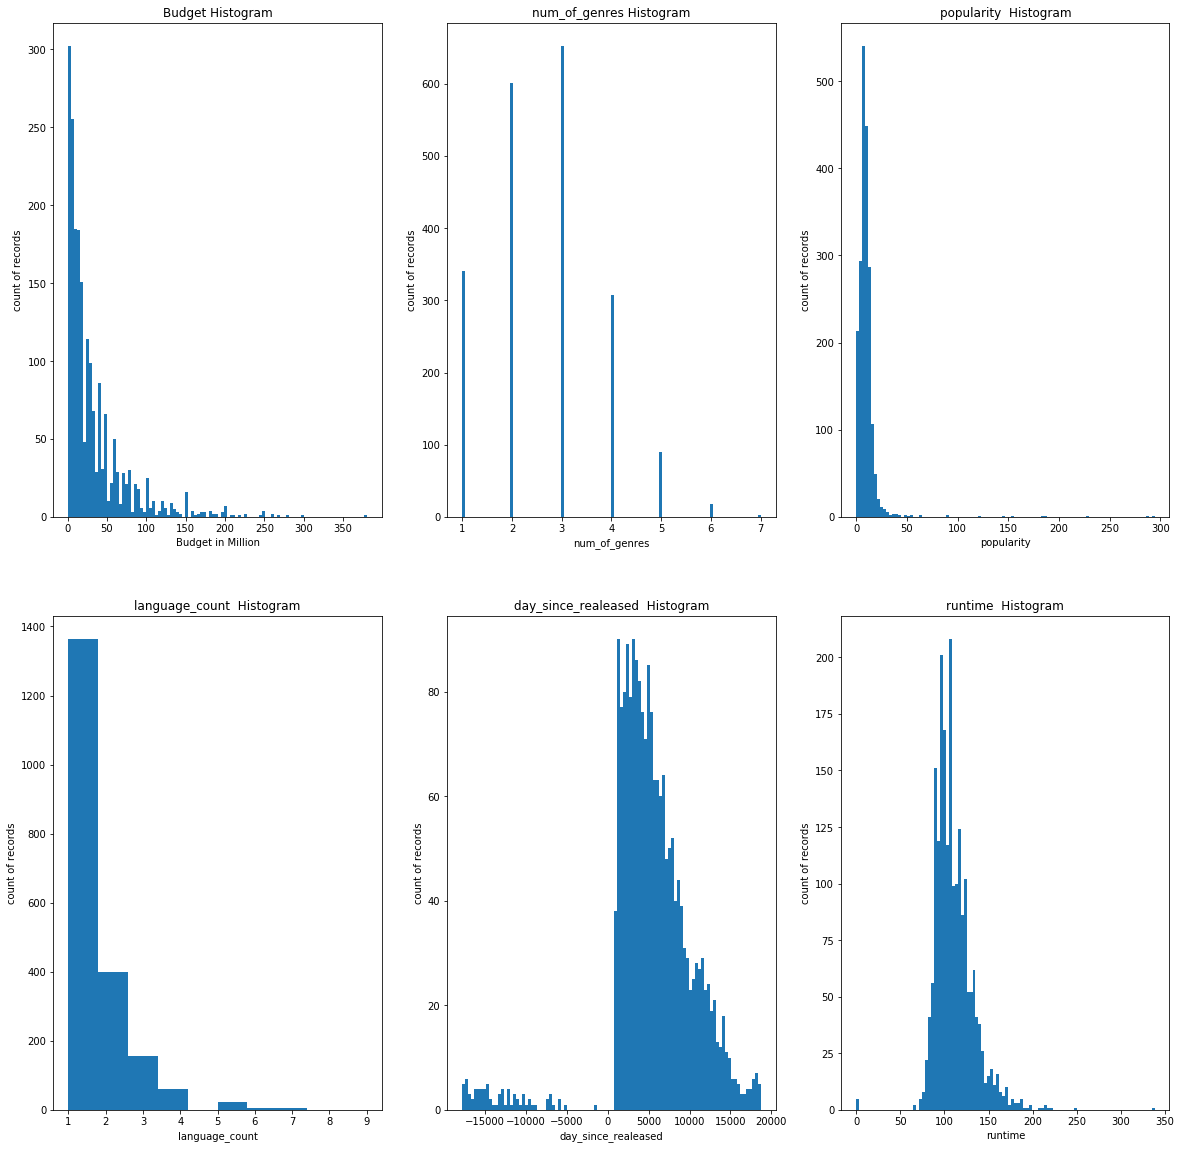

In [200]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,3,figsize=(20,20))
fig.set_label("Histogram of Top 6 features")
ax[0][0].hist(df_train_2['budget'],bins=100)
ax[0][0].set_title("Budget Histogram")
ax[0][0].set(xlabel='Budget in Million', ylabel='count of records')
ax[0][1].hist(df_train_2['num_of_genres'],bins=100)
ax[0][1].set_title("num_of_genres Histogram")
ax[0][1].set(xlabel='num_of_genres', ylabel='count of records')
ax[0][2].hist(df_train_2['popularity'],bins=100)
ax[0][2].set_title("popularity  Histogram")
ax[0][2].set(xlabel='popularity', ylabel='count of records')
ax[1][0].hist(df_train_2['language_count'])
ax[1][0].set_title("language_count  Histogram")
ax[1][0].set(xlabel='language_count', ylabel='count of records')
ax[1][1].hist(df_train_2['day_since_realeased'],bins=100)
ax[1][1].set_title("day_since_realeased  Histogram")
ax[1][1].set(xlabel='day_since_realeased', ylabel='count of records')
ax[1][2].hist(df_train_2['runtime'],bins=100)
ax[1][2].set_title("runtime  Histogram")
ax[1][2].set(xlabel='runtime', ylabel='count of records')

plt.show()

•	Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF.   
Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).  

In [201]:
from scipy import stats

In [202]:
eng_rev = df_train_2.loc[df_train_2['language_is_english'] ==1,['revenue']]

In [203]:
eng_rev_a = stats.norm.pdf(eng_rev['revenue'],np.mean(eng_rev['revenue']),np.std(eng_rev['revenue']))

In [204]:
eng_rev_b = stats.norm.cdf(eng_rev['revenue'],np.mean(eng_rev['revenue']),np.std(eng_rev['revenue']))

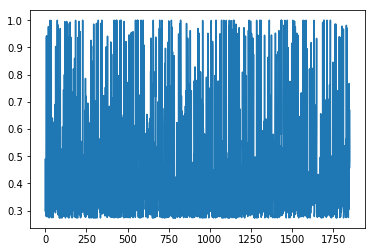

In [205]:
import matplotlib.pyplot as plt
plt.plot(eng_rev_b)
plt.show()

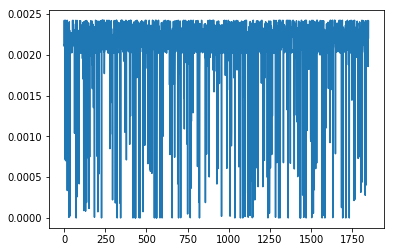

In [206]:
import matplotlib.pyplot as plt
plt.plot(eng_rev_a)
plt.show()

In [207]:
import numpy as np
import scipy.stats as st

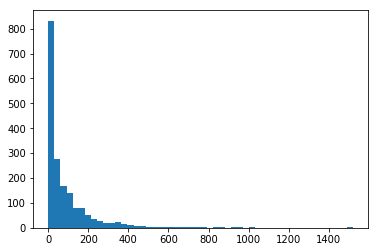

In [208]:

# example of a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
#sample = hstack((sample1, sample2))
sample = eng_rev['revenue']
# plot the histogram
pyplot.hist(sample, bins=50)
pyplot.show()

In [209]:
len(sample1),len(sample2),len(df_train_2),len(df_train_1)

(300, 700, 2012, 2012)

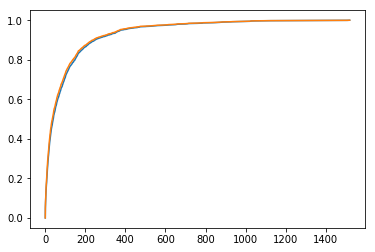

In [210]:

from matplotlib import pyplot
from numpy.random import normal
from statsmodels.distributions.empirical_distribution import ECDF

eng_rev_en = df_train_2.loc[df_train_2['language_is_english'] ==1,['revenue']]
eng_rev = df_train_2['revenue']

sample1 = eng_rev_en['revenue']
sample2 = eng_rev


ecdf1 = ECDF(sample1)
ecdf2 = ECDF(sample2)

# plot the cdf
pyplot.plot(ecdf1.x, ecdf1.y)
pyplot.plot(ecdf2.x, ecdf2.y)
pyplot.xlabel = 'Revenue in million'
pyplot.ylabel = 'CDF'
pyplot.show()


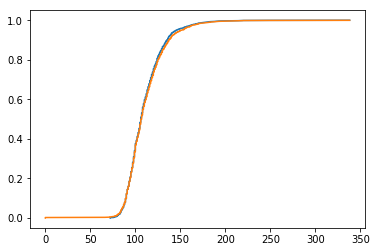

In [193]:

from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF

eng_rev_en = df_train_2.loc[df_train_2['language_is_english'] ==1,['runtime']]
eng_rev = df_train_2['runtime']

sample3 = eng_rev_en['runtime']
sample4 = eng_rev


ecdf1 = ECDF(sample3)
ecdf2 = ECDF(sample4)

# plot the cdf
pyplot.plot(ecdf1.x, ecdf1.y)
pyplot.plot(ecdf2.x, ecdf2.y)
pyplot.xlabel = 'Revenue in million'
pyplot.ylabel = 'CDF'
pyplot.show()

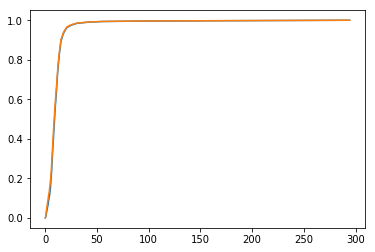

In [194]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF

eng_rev_en = df_train_2.loc[df_train_2['language_is_english'] ==1,['popularity']]
eng_rev = df_train_2['popularity']

sample3 = eng_rev_en['popularity']
sample4 = eng_rev


ecdf1 = ECDF(sample3)
ecdf2 = ECDF(sample4)

# plot the cdf
pyplot.plot(ecdf1.x, ecdf1.y)
pyplot.plot(ecdf2.x, ecdf2.y)
pyplot.xlabel = 'Revenue in million'
pyplot.ylabel = 'CDF'
pyplot.show()

•	Create two scatter plots comparing two variables and provide your analysis on correlation and causation.   
Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [247]:
import matplotlib.pyplot as plt

fig,ax = plt1.subplots(1)
ax.scatter(df_train_1.budget,df_train_1.revenue)
ax.set_title("Budget vs Revenue")
ax.set(xlabel='budget in millions $',ylabel='revenue in million $')

[Text(0, 0.5, 'revenue in million $'), Text(0.5, 0, 'budget in millions $')]

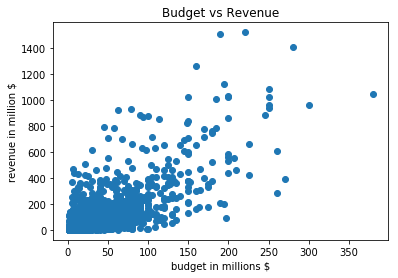

In [248]:
plt.show()

In [252]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)
ax.scatter(df_train_1.runtime,df_train_1.revenue)
ax.set_title("Runtime vs Revenue")
ax.set(xlabel='Runtime in Mins ',ylabel='revenue in million $')

[Text(0, 0.5, 'revenue in million $'), Text(0.5, 0, 'Runtime in Mins ')]

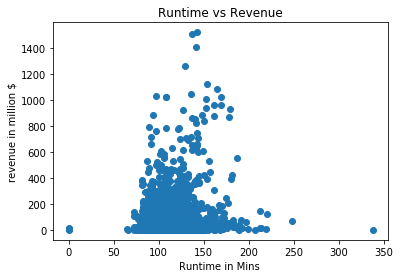

In [253]:
plt.show()

In [267]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)
ax.scatter(df_train_1.loc[df_train_1['popularity']<40,'popularity'],(df_train_1.loc[df_train_1['popularity']<40,'revenue']))
ax.set_title("popularity vs Revenue")
ax.set(xlabel='popularity ',ylabel='revenue in million $')

[Text(0, 0.5, 'revenue in million $'), Text(0.5, 0, 'popularity ')]

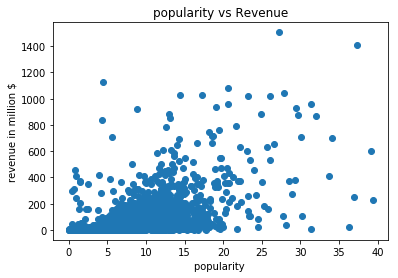

In [268]:
plt.show()

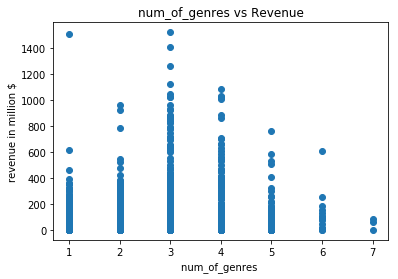

In [270]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)
ax.scatter(df_train_1['num_of_genres'],df_train_1['revenue'])
ax.set_title("num_of_genres vs Revenue")
ax.set(xlabel='num_of_genres ',ylabel='revenue in million $')
plt.show()

Corrlation analysis

In [272]:
import scipy.stats as st
st.pearsonr(df_train_1.budget,df_train_1.revenue)

(0.7340067054436022, 0.0)

Budget and revenue seems to be stringly correlated with a p-value less than 0.05.  
Thus the correlation is statistically significant.  

In [286]:
import scipy.stats as st
df_train_3 = df_train_1.dropna()
st.pearsonr(df_train_3.runtime,df_train_3.revenue)

(0.20170551212510718, 6.61814702944029e-20)

Movie Runtime and revenue doesn't seem to be  correlated with a vey small p-value less than 0.05.  
Thus the correlation is statistically significant.  

In [288]:
import scipy.stats as st
st.pearsonr(df_train_3.popularity,df_train_3.revenue)

(0.4359925127357491, 4.3153222778910924e-94)

Movie popularity and revenue doesn't seem to be  correlated with a vey small p-value less than 0.05.  
Thus the correlation is statistically significant. 

•	Conduct a test on your hypothesis using one of the methods covered in Chapter 9.  

Null Hypotheis: At an average a movie with 3 different genres has higher revenue than one with 4 different genres
Alternate Hypothesis: At an average a movie with 3 different genres has higher revenue than one with 4 different genres
    

In [297]:
movie_genr_3_4 = df_train_3.loc[(df_train_3.num_of_genres>3) & (df_train_3.num_of_genres<6)]

In [306]:
from scipy.stats import ttest_ind

data1 = movie_genr_3_4.revenue
data2 = df_train_3.revenue

mean1 = np.mean(movie_genr_3_4.revenue)
mean2 = np.mean(df_train_3.revenue)
print("Average renenue of movies with 3 or 4 genres is :${}M".format(mean1))
print("Average renenue of movies with other than 3 or 4 genres is :${}M".format(mean2))

stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Difference in mean is not significant')
else:
    print('Difference in mean is significant')

Average renenue of movies with 3 or 4 genres is :$123.30949550502511M
Average renenue of movies with other than 3 or 4 genres is :$93.86691896867231M
stat=3.280, p=0.001
Difference in mean is significant


Thus , if there are less than 3 or more than 4 genres of a movie it is likely to make less money than other movies with 3 and 4 genres. 

•	For this project, conduct a regression analysis on either one dependent and one explanatory variable,   
or multiple explanatory variables (Chapter 10 & 11).



In [342]:
# final_col_x = ['budget',
#  'num_of_genres',
#  'runtime',
#  'popularity',
#  'prodcution_company_count',
#  'language_count',
#  'language_is_english',
#  'day_since_realeased']
# final_col_y = ['revenue']
final_col_x = ['budget',
 'num_of_genres',
 'runtime',
 'prodcution_company_count',
 'language_count',
 'language_is_english']
final_col_y = ['revenue']

In [343]:
x_data = df_train_3[final_col_x]
y_data = df_train_3[final_col_y]

In [344]:
from  sklearn.model_selection import train_test_split
from sklearn import  linear_model

In [345]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state=7)

In [346]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1608, 6), (403, 6), (1608, 1), (403, 1))

In [347]:
lm = linear_model.LinearRegression()
model_house_price = lm.fit(x_train,y_train)

Training Error:

In [348]:
lm.score(x_train,y_train)

0.546817660364014

Testing error:

In [349]:
y_pred = lm.predict(x_test)

In [350]:
lm.score(x_test,y_test)

0.5247748293719781

In [351]:
lm.intercept_

array([-23.96267465])

In [352]:
lm.coef_

array([[ 2.90666839, -3.57455465,  0.42831778, -3.50464322, -3.27189136,
        -2.03812046]])